<a href="https://colab.research.google.com/github/ArtiPhadke/Arti_INFO5731_Spring2023/blob/main/In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

Arti Phadke - in-class exercise 5

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Write your code here

# importing the necessary packages & the training dataset
import pandas as pd
dataset = pd.read_csv('stsa-train2.csv', usecols = ['review', 'text'])

# display first few rows
dataset.head()

,review,text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [ ]:
# importing the necessary packages & the test dataset
import pandas as pd
dataset_test = pd.read_csv('stsa-test2.csv',usecols = ['review', 'text'])

# display first few rows
dataset_test.head()

,review,text
0,0,no movement no yuks not much of anything .
1,0,a gob of drivel so sickly sweet even the eage...
2,0,gangs of new york is an unapologetic mess who...
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


In [ ]:
# importing packages necessary for further processing & data cleaning
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# define function to clean the data
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    Message = text.lower()
    Message = re.sub('\[.*?\]', '', Message)
    Message = re.sub('https?://\S+|www\.\S+', '', Message)
    Message = re.sub('<.*?>+', '', Message)
    Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
    Message = re.sub('\n', '', Message)
    Message = re.sub('\w*\d\w*', '', Message)
    return Message

dataset['cleanText'] = dataset['text'].apply(clean_text)

In [ ]:
# display first few rows after data cleaning
dataset.head()

,review,text,cleanText
0,1,"a stirring , funny and finally transporting re...",a stirring funny and finally transporting rei...
1,0,apparently reassembled from the cutting-room f...,apparently reassembled from the cuttingroom fl...
2,0,they presume their audience wo n't sit still f...,they presume their audience wo nt sit still fo...
3,1,this is a visually stunning rumination on love...,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...,jonathan parker s bartleby should have been th...


In [ ]:
import string
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    Message = text.lower()
    Message = re.sub('\[.*?\]', '', Message)
    Message = re.sub('https?://\S+|www\.\S+', '', Message)
    Message = re.sub('<.*?>+', '', Message)
    Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
    Message = re.sub('\n', '', Message)
    Message = re.sub('\w*\d\w*', '', Message)
    return Message

dataset_test['cleanText'] = dataset_test['text'].apply(clean_text)

In [ ]:
dataset_test.head()

,review,text,cleanText
0,0,no movement no yuks not much of anything .,no movement no yuks not much of anything
1,0,a gob of drivel so sickly sweet even the eage...,a gob of drivel so sickly sweet even the eage...
2,0,gangs of new york is an unapologetic mess who...,gangs of new york is an unapologetic mess who...
3,0,we never really feel involved with the story ...,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .,this is one of polanski s best films


In [ ]:
# define dependent & independent variables X & Y
x = dataset["cleanText"]
y = dataset["review"]

In [ ]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

# divide data into training &  test (validation) with 80%-20% split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# define the cross_validation function, for no. of folds = 10
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

In [ ]:
# importing required libraries for building, running & evaluation models
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# perform TFIDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(dataset["cleanText"]).toarray()
test_tfidf = tfidf_vectorizer.transform(dataset_test["cleanText"]).toarray()

In [ ]:
# define the test data - x & y
x_test = test_tfidf
y_test = dataset_test["review"]

In [ ]:
# partitioning dataset into training & validation
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_tfidf,dataset["review"],test_size = 0.2, random_state = 202)

Naive Bayes

In [ ]:
# imports for Multinomial NB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Multinomial NB
# create & fit the model:
cl_NB = MultinomialNB()
model_NB = cl_NB.fit(x_train, y_train) 
pr_NB = cl_NB.predict(x_valid) 

In [ ]:
# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_valid, pr_NB)*100),"%")

Accuracy =  80 %


In [ ]:
# printing the evaluation measures: precision
print ("Percision = ", round(precision_score(y_valid, pr_NB, pos_label=0)*100),"%")

Percision =  82 %


In [ ]:
# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_valid, pr_NB, pos_label=0)*100),"%")

Recall =  74 %


In [ ]:
# printing the evaluation measures: F1 score
print ("F1 Score = ", round(f1_score(y_valid, pr_NB, pos_label=0)*100),"%")

F1 Score =  78 %


In [ ]:
# classification report
print("Classification Report - ")
cr_NB = classification_report(y_valid, pr_NB)
print(cr_NB)

Classification Report - 
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       667
           1       0.78      0.85      0.81       717

    accuracy                           0.80      1384
   macro avg       0.80      0.80      0.80      1384
weighted avg       0.80      0.80      0.80      1384



In [ ]:
# printing the 10-fold cross validation score
print("10-fold cross-val score for Naive Bayes is -")
ac_NB = cross_val_score(estimator = cl_NB, X = x_train, y = y_train, cv = 10)
print(f"{round(ac_NB.mean()*100)}%")

10-fold cross-val score for Naive Bayes is -
78%


In [ ]:
pr_NB2 = cl_NB.predict(x_test) 

In [ ]:
# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_test, pr_NB2)*100),"%")

Accuracy =  81 %


In [ ]:
# printing the evaluation measures: precision
print ("Percision = ", round(precision_score(y_test, pr_NB2, pos_label=0)*100),"%")

Percision =  86 %


In [ ]:
# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_test, pr_NB2, pos_label=0)*100),"%")

Recall =  74 %


In [ ]:
# printing the evaluation measures: F1 score
print ("F1 Score = ", round(f1_score(y_test, pr_NB2, pos_label=0)*100),"%")

F1 Score =  79 %


In [ ]:
# printing the classification report
print("Classification Report - ")
cr_NB2 = classification_report(y_test, pr_NB2)
print(cr_NB2)

Classification Report - 
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       912
           1       0.77      0.88      0.82       909

    accuracy                           0.81      1821
   macro avg       0.81      0.81      0.81      1821
weighted avg       0.81      0.81      0.81      1821



In [ ]:
# printing the 10-fold cross validation score
print("10-fold cross-val score for Naive Bayes is -")
ac_NB2 = cross_val_score(estimator = cl_NB, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_NB2.mean()*100)}%")

10-fold cross-val score for Naive Bayes is -
74%


SVM

In [ ]:
# imports for SVM
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# SVM
# create & fit the model:
cl_SVM = svm.SVC()
model_SVM = cl_SVM.fit(x_train, y_train) 
pr_SVM = cl_SVM.predict(x_valid) 

In [ ]:
# printing the classification report
print("Classification Report - ")
cr_SVM = classification_report(y_valid, pr_SVM)
print(cr_SVM)

Classification Report - 
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       667
           1       0.79      0.82      0.80       717

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
print("10-fold cross-val score for SVM is -")
ac_SVM = cross_val_score(estimator = cl_SVM, X = x_train, y = y_train, cv = 10)
print(f"{round(ac_SVM.mean()*100)}%")

10-fold cross-val score for SVM is -


In [ ]:
pr_SVM2 = cl_SVM.predict(x_test)

In [ ]:
# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_test, pr_SVM2)*100),"%")

In [ ]:
# printing the evaluation measures: precision
print ("Percision = ", round(precision_score(y_test, pr_SVM2, pos_label=0)*100),"%")

In [ ]:
# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_test, pr_SVM2, pos_label=0)*100),"%")

In [ ]:
# printing the evaluation measures: F1 score
print ("F1 Score = ", round(f1_score(y_test, pr_SVM2, pos_label=0)*100),"%")

In [ ]:
# printing the classification report
print("Classification Report - ")
cr_SVM2 = classification_report(y_test, pr_SVM2)
print(cr_SVM2)

In [ ]:
# printing the 10-fold cross-val score
print("10-fold cross-val score for SVM is -")
ac_SVM2 = cross_val_score(estimator = cl_SVM, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_SVM2.mean()*100)}%")

KNN

In [ ]:
# imports for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# KNN
cl_KNN = KNeighborsClassifier(n_neighbors = 4)
model_knn = cl_KNN.fit(x_train, y_train) 
pr_KNN = cl_KNN.predict(x_valid)

In [ ]:
# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_valid, pr_KNN)*100),"%")

Accuracy =  72 %


In [ ]:
# printing the evaluation measures: precision
print ("Percision = ", round(precision_score(y_valid, pr_KNN, pos_label=0)*100),"%")


Percision =  67 %


In [ ]:
# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_valid, pr_KNN, pos_label=0)*100),"%")


Recall =  82 %


In [ ]:
# printing the evaluation measures: F1 score
print ("F1 Score = ", round(f1_score(y_valid, pr_KNN, pos_label=0)*100),"%")

F1 Score =  74 %


In [ ]:
# Print the classification report
print("Classification Report -")
cr_KNN = classification_report(y_valid, pr_KNN)
print(cr_KNN)

Classification Report -
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       667
           1       0.79      0.62      0.69       717

    accuracy                           0.72      1384
   macro avg       0.73      0.72      0.72      1384
weighted avg       0.73      0.72      0.72      1384



In [ ]:
# perform the 10 fold cross validation
print("10-fold cross-val score for KNN is -")
ac_KNN = cross_val_score(estimator = cl_KNN, X = x_train, y = y_train, cv = 10)
print(f"{round(ac_KNN.mean()*100)}%")

10-fold cross-val score for KNN is -
69%


In [ ]:
# calculate the accuracy
pr_KNN2 = cl_KNN.predict(x_test) 

In [ ]:
# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_test, pr_KNN2)*100),"%")

Accuracy =  71 %


In [ ]:
# printing the evaluation measures: Precision
print ("Precision = ", round(precision_score(y_test, pr_KNN2, pos_label=0)*100),"%")

Precision =  68 %


In [ ]:
# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_test, pr_KNN2, pos_label=0)*100),"%")

Recall =  80 %


In [ ]:
# printing the evaluation measures: F1 score
print ("F1 Score = ", round(f1_score(y_test, pr_KNN2, pos_label=0)*100),"%")

F1 Score =  74 %


In [ ]:
# Print the classification report
print("Classification Report - ")
cr_KNN2 = classification_report(y_test, pr_KNN2)
print(cr_KNN2)

Classification Report - 
              precision    recall  f1-score   support

           0       0.68      0.80      0.74       912
           1       0.75      0.63      0.69       909

    accuracy                           0.71      1821
   macro avg       0.72      0.71      0.71      1821
weighted avg       0.72      0.71      0.71      1821



In [ ]:
# perform the 10 fold cross validation
print("10-fold cross-val score for KNN is -")
ac_KNN2 = cross_val_score(estimator = cl_KNN, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_KNN2.mean()*100)}%")

10-fold cross-val score for KNN is -
66%


Decision Tree

In [ ]:
# Imports for decision tree:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# create & fit the model:
cl_DT = DecisionTreeClassifier()
model_DT = cl_DT.fit(x_train, y_train) 
pr_DT = cl_DT.predict(x_valid) 

In [ ]:
# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_valid, pr_DT)*100),"%")

Accuracy =  60 %


In [ ]:
# printing the evaluation measures: precision
print ("Precision = ", round(precision_score(y_valid, pr_DT, pos_label=0)*100),"%")

Precision =  59 %


In [ ]:
# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_valid, pr_DT, pos_label=0)*100),"%")

Recall =  57 %


In [ ]:
# printing the evaluation measures: F1 score
print ("F1 score = ", round(f1_score(y_valid, pr_DT, pos_label=0)*100),"%")

F1 score =  58 %


In [ ]:
# printing the classification report
print("Classification Report -")
cl_report_DT = classification_report(y_valid, pr_DT)
print(cl_report_DT)

Classification Report -
              precision    recall  f1-score   support

           0       0.60      0.54      0.57       667
           1       0.61      0.67      0.64       717

    accuracy                           0.61      1384
   macro avg       0.61      0.61      0.60      1384
weighted avg       0.61      0.61      0.61      1384



In [ ]:
# printing the 10-fold cross validation score
print("10-fold cross-val score for decision tree is -")
acc_cv_DT = cross_val_score(estimator = cl_DT, X = x_train, y = y_train, cv = 10)
print(f"{round(acc_cv_DT.mean()*100)}%")

 10-fold cross-val score for decision tree is -
61%


In [ ]:
# predict the evaluation measures for test data
pr_DT2 = cl_DT.predict(x_test) 
print ("Accuracy = ", round(accuracy_score(y_test, pr_DT2)*100),"%")

Accuracy =  60 %


In [ ]:
# predict the evaluation measures for test data: Precision
print ("Precision = ", round(precision_score(y_test, pr_DT2, pos_label=0)*100),"%")

Precision =  61 %


In [ ]:
# predict the evaluation measures for test data: recall
print ("Recall = ", round(recall_score(y_test, pr_DT2, pos_label=0)*100),"%")

Recall =  55 %


In [ ]:
# predict the evaluation measures for test data: F1 score
print ("F1 Score = ", round(f1_score(y_test, pr_DT2, pos_label=0)*100),"%")

F1 Score =  58 %


In [ ]:
# printing the classification report
print("Classification Report -")
cr_dt_test = classification_report(y_test, pr_DT2)
print(cr_dt_test)

Classification Report -
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       912
           1       0.59      0.65      0.62       909

    accuracy                           0.60      1821
   macro avg       0.60      0.60      0.60      1821
weighted avg       0.60      0.60      0.60      1821



In [ ]:
# find the 10-fold cross validation score
print("10-fold cross-val score for decision tree is -")
acc_dt2 = cross_val_score(estimator = cl_DT, X = x_test, y = y_test, cv = 10)
print(f"{round(acc_dt2.mean()*100)}%")

10-fold cross-val score for decision tree is -
61%


Random forest

In [ ]:
# imports for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# create and fit the Random forest model
cl_RF = RandomForestClassifier()
model_RF = cl_RF.fit(x_train, y_train) 
pr_RF = cl_RF.predict(x_valid) 

In [ ]:
# printing the evaluation measures
print ("Accuracy = ", round(accuracy_score(y_valid, pr_RF)*100),"%")

Accuracy =  70 %


In [ ]:
print ("Percision = ", round(precision_score(y_valid, pr_RF, pos_label=0)*100),"%")

Percision =  70 %


In [ ]:
print ("Recall = ", round(recall_score(y_valid, pr_RF, pos_label=0)*100),"%")

Recall =  65 %


In [ ]:
print ("F1 Score= ", round(f1_score(y_valid, pr_RF, pos_label=0)*100),"%")

F1 Score=  67 %


In [ ]:
# printing the classification report
print("Classification Report - ")
cr_RF = classification_report(y_valid, pr_RF)
print(cr_RF)

Classification Report - 
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       667
           1       0.69      0.75      0.72       717

    accuracy                           0.70      1384
   macro avg       0.70      0.70      0.70      1384
weighted avg       0.70      0.70      0.70      1384



In [ ]:
# finding the 10-fold cross validation score
print("10-fold cross-val score for random forest is -")
cv_RF = cross_val_score(estimator = cl_RF, X = x_train, y = y_train, cv = 10)
print(f"{round(cv_RF.mean()*100)}%")

10-fold cross-val score for random forest is -
71%


In [ ]:
# predict for test dataset
pr_RF2 = cl_RF.predict(x_test) 

In [ ]:
# finding the evaluation measures - accuracy
print ("Accuracy = ", round(accuracy_score(y_test, pr_RF2)*100),"%")

Accuracy =  72 %


In [ ]:
# finding the evaluation measures - precision
print ("Percision = ", round(precision_score(y_test, pr_RF2, pos_label=0)*100),"%")

Percision =  75 %


In [ ]:
# finding the evaluation measures - recall
print ("Recall = ", round(recall_score(y_test, pr_RF2, pos_label=0)*100),"%")

Recall =  66 %


In [ ]:
# finding the evaluation measures - F1 score
print ("F1 Score = ", round(f1_score(y_test, pr_RF2, pos_label=0)*100),"%")

F1 Score =  70 %


In [ ]:
# printing the classification report for test data
cr_rf_test = classification_report(y_test, pr_RF2)
print("Classification Report: ", "\n", "\n",cr_rf_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       912
           1       0.69      0.77      0.73       909

    accuracy                           0.72      1821
   macro avg       0.72      0.72      0.72      1821
weighted avg       0.72      0.72      0.72      1821



In [ ]:
# finding the 10-fold cross validation score
print("10-fold cross-val score for random forest is -")
ac_RF = cross_val_score(estimator = cl_RF, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_RF.mean()*100)}%")

10-fold cross-val score for random forest is -
68%


XGBoost

In [ ]:
!pip install xgboost

In [ ]:
# imports for XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# XGBoost
cl_XGB = XGBClassifier()
model_XGB = cl_XGB.fit(x_train, y_train) 
pr_XGB = cl_XGB.predict(x_valid) 

In [ ]:
# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_valid, pr_XGB )*100),"%")

Accuracy =  69 %


In [ ]:
# printing the evaluation measures: precision 
print ("Percision = ", round(precision_score(y_valid, pr_XGB, pos_label=0)*100),"%")

Percision =  71 %


In [ ]:
# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_valid, pr_XGB, pos_label=0)*100),"%")

Recall =  61 %


In [ ]:
# printing the evaluation measures: F1 score
print ("F1 Score = ", round(f1_score(y_valid, pr_XGB, pos_label=0)*100),"%")

F1 Score =  66 %


In [ ]:
# printing the classification report
print("Classification Report - ")
cr_XGB = classification_report(y_valid, pr_XGB)
print(cr_XGB)

Classification Report - 
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       667
           1       0.68      0.77      0.72       717

    accuracy                           0.69      1384
   macro avg       0.70      0.69      0.69      1384
weighted avg       0.70      0.69      0.69      1384



In [ ]:
# printing the 10-fold cross validation score
print("10-fold cross-val score for XGB is -")
ac_XGB = cross_val_score(estimator = cl_XGB, X = x_train, y = y_train, cv = 10)
print(f"{round(ac_XGB.mean()*100)}%")

10-fold cross-val score for XGB is -
71%


In [ ]:
pr_XGB2 = cl_XGB.predict(x_test) 

In [ ]:
# printing the evaluation measures: accuracy
print ("Accuracy = ", round(accuracy_score(y_test, pr_XGB2)*100),"%")

Accuracy =  72 %


In [ ]:
# printing the evaluation measures: precision
print ("Percision = ", round(precision_score(y_test, pr_XGB2, pos_label=0)*100),"%")

Percision =  76 %


In [ ]:
# printing the evaluation measures: recall
print ("Recall = ", round(recall_score(y_test, pr_XGB2, pos_label=0)*100),"%")

Recall =  64 %


In [ ]:
# printing the evaluation measures: F1 score
print ("F1 Score = ", round(f1_score(y_test, pr_XGB2, pos_label=0)*100),"%")

F1 Score =  70 %


In [ ]:
# printing the classification report
print("Classification Report - ")
cr_XGB2 = classification_report(y_test, pr_XGB2)
print(cr_XGB2)

Classification Report - 
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       912
           1       0.69      0.80      0.74       909

    accuracy                           0.72      1821
   macro avg       0.73      0.72      0.72      1821
weighted avg       0.73      0.72      0.72      1821



In [ ]:
# printing the 10-fold cross validation score
print("10-fold cross-val score for XGB is -")
ac_XGB2 = cross_val_score(estimator = cl_XGB, X = x_test, y = y_test, cv = 10)
print(f"{round(ac_XGB2.mean()*100)}%")

10-fold cross-val score for XGB is -
66%


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
#Write your code here.

# download the packages required for the data cleaning
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

# define function to clean the data
def preprocess(s):
    s=str(s)
    # convert to lowercase
    s = s.lower()
    # remove the HTML tags from the text
    s=s.replace('{html}',"") 
    # remove special characters
    cr = re.compile('<.*?>')
    ct = re.sub(cr, '', s)
    rem=re.sub(r'http\S+', '',ct)
    # remove numerical data
    remn = re.sub('[0-9]+', '', rem)
    # create and run the tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(remn)  
    # remove the stopwords
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    # convert to stemmed words
    w_stem=[stemmer.stem(w) for w in filtered_words]
    # convert to lemmatized words
    w_lemm=[lemmatizer.lemmatize(w) for w in w_stem]
    # create a string of filtered words and return the same to calling function
    return " ".join(filtered_words)

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
# importing required libraries
import pandas as pd
# selected the first 50000 rows of data since Colab kernel crashed while processing 400K records
df_amazon = pd.read_csv('Amazon_Unlocked_Mobile2.csv')
# clean the data
df_amazon['cleanReviews']=df_amazon['Reviews'].map(lambda s:preprocess(s)) 
# display the first few rows of the data
df_amazon.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,cleanReviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone used hard phone li...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,works good goes slow sometimes good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,great phone replace lost phone thing volume bu...


In [ ]:
# importing required libraries for TFIDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
# transform the cleaned data from 'cleanReviews' column
tfidf_vects = tfidf_vect.fit_transform(df_amazon['cleanReviews'].values.astype('U'))
names= tfidf_vect.get_feature_names_out()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Frequency')

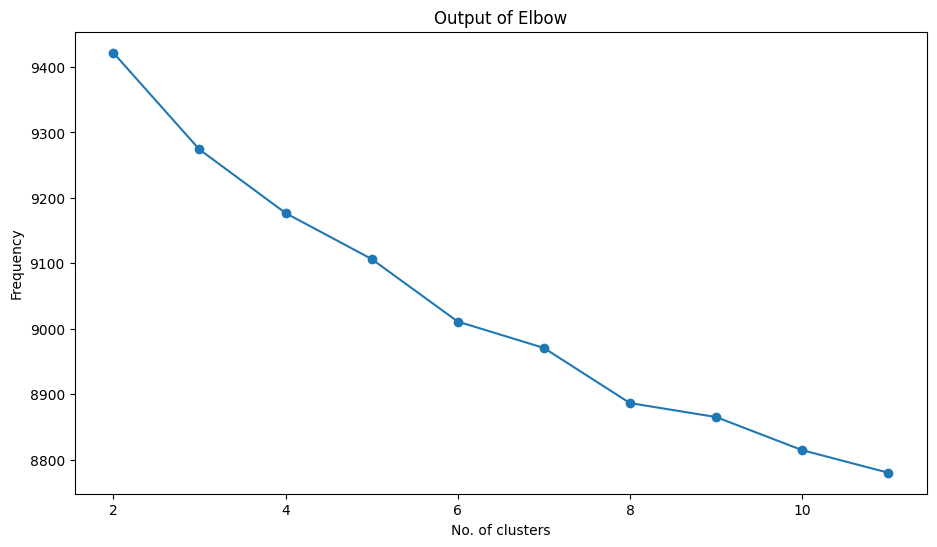

In [ ]:
# importing the required libraries for elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# create an empty array
w = []
# run the code for 2-11 clusters
for i in range(2,12):
    # run the method for KMeans for different values of clusters
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 202)
    # fit the model
    kmeans.fit(tfidf_vects)
    w.append(kmeans.inertia_)

# plot the graph
plt.figure(figsize = (11,6))
plt.plot(range(2,12), w, marker = "o")
plt.title ("Output of Elbow")
plt.xlabel("No. of clusters")
plt.ylabel("Frequency")

In [ ]:
# selecting no of clusters = 6 as shown by Elbow method
# import required libraries
from sklearn.cluster import KMeans
# create and fit the model
model = KMeans(n_clusters = 6,init='k-means++',max_iter=100, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({1: 7132, 4: 386, 0: 1564, 3: 498, 2: 212, 5: 207})

In [ ]:
# Show the top 10 keywords from each cluster
top_words = 10
# calculate the centroids
centroids = model.cluster_centers_.argsort()[:, ::-1]
for n in range(6):
    key_features = [names[i] for i in centroids[n, :top_words]]
    print('Cluster '+str(n+1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['new', 'iphone', 'phone', 'like', 'brand', 'great', 'works', 'came', 'good', 'condition']
Cluster 2
Top Words: ['phone', 'good', 'work', 'great', 'works', 'screen', 'perfect', 'nice', 'use', 'one']
Cluster 3
Top Words: ['excellent', 'product', 'recommend', 'phone', 'thanks', 'condition', 'thank', 'seller', 'arrived', 'great']
Cluster 4
Top Words: ['great', 'works', 'phone', 'product', 'price', 'condition', 'fast', 'shipping', 'expected', 'service']
Cluster 5
Top Words: ['good', 'phone', 'product', 'works', 'far', 'condition', 'thanks', 'price', 'buy', 'item']
Cluster 6
Top Words: ['love', 'phone', 'great', 'works', 'thanks', 'thank', 'much', 'best', 'fast', 'iphone']


In [ ]:
# print the cluster centers
cc=model.cluster_centers_
cc

array([[0.00000000e+00, 1.78002094e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.55881318e-03, 0.00000000e+00],
       [8.28939903e-06, 0.00000000e+00, 2.70457662e-04, ...,
        4.98439175e-05, 0.00000000e+00, 5.23524081e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
# run the DBSCAN algorithm
# import required libraries
import gensim
import numpy as np

reviews=[]
vectors = []

for i in df_amazon['cleanReviews']:
    reviews.append(str(i).split())

# run the Word2Vec model
w2v_model=gensim.models.Word2Vec(reviews, workers=4)

for i in reviews:
    v = np.zeros(100)
    # create a count of occurences for each word
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            v += vec
            count += 1
        except:
            pass
    v = v/count
    vectors.append(v)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

<ipython-input-11-d726504a11e3>:26: RuntimeWarning: invalid value encountered in true_divide
  v = v/count


In [ ]:
from sklearn.cluster import DBSCAN
min = 2 * 100
# Lower bound function
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def findNN(x, data): 
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 20 and dists[19] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 20 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.    
    return dists[20]

vectors.shape

(49999, 100)

In [ ]:
# Create the model for DBSCAN
model_dbs = DBSCAN(eps = 5, min_samples = min)
model_dbs.fit(vectors)

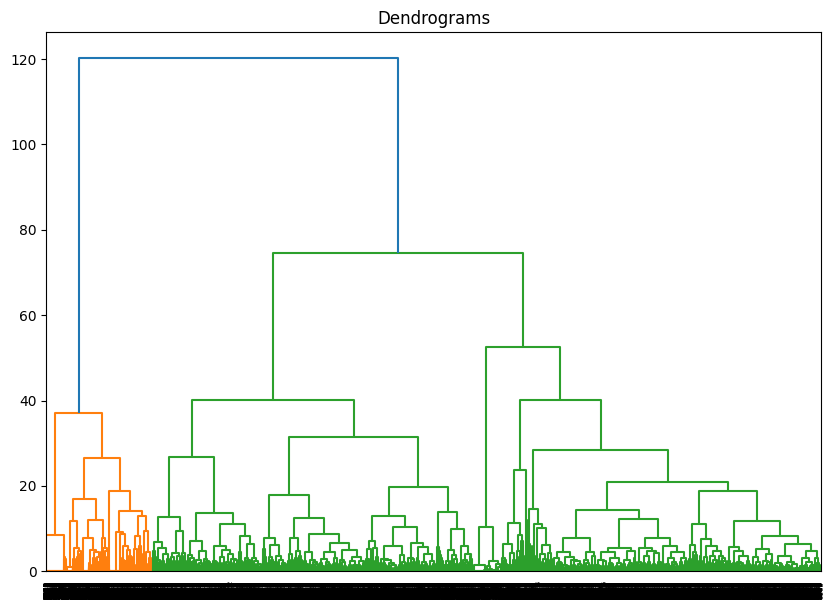

In [ ]:
# Hierarchical clustering
# importing the required libraries
import scipy.cluster.hierarchy as shc

# plot the dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(vectors, method='ward'))

In [ ]:
# printing the cluster labels
df_amazon['cluster_labels'] = cluster.labels_
df_amazon.head()

In [ ]:
hier_df = df_amazon # Give the labels and group to count the number of data in each clusters.
hier_df["Hierarchial Cluster Labels"] = cluster.labels_
hier_df.groupby(["Hierarchial Cluster Labels"])["Reviews"].count()

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)

# DBSCAN clustering works based on density of points in a region. It has an advantage that the user doesn't need to specify the no. of clusters 
# in advance. Hierarchical clustering works on bottom up approach as shown in above figure in the dendrogram. K-Means clustering works on the 
# principle dividing the data into clusters based on which points are closest to the center of a predefined cluster.
# In this case, hierarchical clustering has shown a clear output.